In [1]:
import sys
import tensorflow as tf
from tensorflow import keras
import numpy as np
import sklearn
import os
import matplotlib as mlp
import matplotlib.pyplot as plt

(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
def exponential_decay(lr0, s):
  def exponential_decay_fn(epoch):
    return lr0 * 0.1 ** (epoch/s)
  return exponential_decay_fn
exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[28, 28]),
  keras.layers.Dense(300, activation='selu', kernel_initializer='lecun_normal'),
  keras.layers.Dense(100, activation='selu', kernel_initializer='lecun_normal'),
  keras.layers.Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='nadam', metrics='accuracy')
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train_scaled, y_train, epochs=20, validation_data=(X_test_scaled, y_test), callbacks=[lr_scheduler])

Epoch 1/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.8644 - accuracy: 0.7525 - val_loss: 1.0965 - val_accuracy: 0.6904
Epoch 2/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7329 - accuracy: 0.7847 - val_loss: 0.7833 - val_accuracy: 0.7912
Epoch 3/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6156 - accuracy: 0.8135 - val_loss: 0.7451 - val_accuracy: 0.8189
Epoch 4/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5573 - accuracy: 0.8329 - val_loss: 0.8647 - val_accuracy: 0.7666
Epoch 5/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4972 - accuracy: 0.8485 - val_loss: 0.6002 - val_accuracy: 0.8362
Epoch 6/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4558 - accuracy: 0.8589 - val_loss: 0.5568 - val_accuracy: 0.8385
Epoch 7/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4220 - accuracy: 0.8669 - val_loss: 0.5422 - val_accuracy:

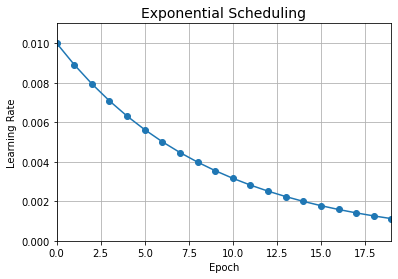

In [6]:
plt.plot(history.epoch, history.history["lr"], "o-")
plt.axis([0, 20 - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.grid(True)
plt.show()